In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.express as px
import pandas as pd
plt.rcParams['figure.figsize'] = [6, 6]

In [63]:
# familiaridad de aminas
# https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0302-y

In [2]:
%cd ..

/home/belu/VS Workplace/licentiate-thesis-repo


In [19]:
import src.data.notebook_utils as utils

df = utils.read_data()

In [24]:
amine_df = df[utils.get_columns(df.columns)['_feat_']]

In [25]:
amine_info = df[['_rxn_organic-inchikey']]

In [27]:
amine_all = pd.concat([amine_df, amine_info], axis='columns')

In [30]:
amine_df = amine_all.drop_duplicates()

In [31]:
len(amine_df)

29

In [35]:
chemical_names = utils.read_chemical_info()

In [36]:
chemical_names = chemical_names[['Chemical Abbreviation', 'InChI Key (ID)']].dropna()
df_amine_with_names = amine_df.set_index('_rxn_organic-inchikey').join(chemical_names.set_index('InChI Key (ID)'), how='inner').reset_index().rename({'index': '_rxn_organic-inchikey'}, axis='columns')

In [37]:
df_amine_with_names.head()

,_rxn_organic-inchikey,_feat_AvgPol,_feat_MaximalProjectionArea,_feat_CarboRingCount,_feat_LengthPerpendicularToTheMaxArea,_feat_molsurfaceareaASAp,_feat_RingAtomCount,_feat_WienerPolarity,_feat_SmallestRingSize,_feat_ChainAtomCount,...,_feat_ProtPolarSurfaceArea,_feat_ChiralCenterCount,_feat_RotatableBondCount,_feat_MinimalProjectionRadius,_feat_fr_amidine,_feat_fr_dihydropyridine,_feat_fr_NH0,_feat_fr_piperzine,_feat_msareaASAp,Chemical Abbreviation
0,UZHWWTHDRVLCJU-UHFFFAOYSA-N,11.82,39.83,0,5.30,215.08,0,3,0,6,...,27.64,0,2,3.18,0,0,0,0,215.08,IPentylammoniumIodide
1,GGYGJCFIYJVWIP-UHFFFAOYSA-N,6.58,26.37,0,4.26,172.93,0,0,0,4,...,51.61,0,0,3.14,1,0,0,0,172.93,AcNH3I
2,YYMLRIWBISZOMT-UHFFFAOYSA-N,10.00,34.28,0,5.73,206.64,0,2,0,5,...,16.61,0,2,2.80,0,0,0,0,206.64,Diethylammoniumiodide
3,VMLAEGAAHIIWJX-UHFFFAOYSA-N,7.93,28.47,0,5.24,167.58,0,0,0,4,...,27.64,0,0,3.16,0,0,0,0,167.58,iPropylammoniumIodide
4,KOAGKPNEVYEZDU-UHFFFAOYSA-N,13.18,46.91,1,5.02,189.88,6,13,6,5,...,27.64,0,1,3.48,0,0,0,0,189.88,4TrifluoromethylPhenylammoniumIodide


In [39]:
amine_df = df_amine_with_names.drop(['Chemical Abbreviation','_rxn_organic-inchikey'], axis='columns')

In [40]:
X = StandardScaler().fit_transform(amine_df)

In [41]:
def explore_dbscan(X, range_distance):
    clusters_size = np.zeros(range_distance.shape[0])
    for num, distance in enumerate(range_distance):
        db = DBSCAN(eps=distance, min_samples=1).fit(X)
        clusters_size[num] = len(set(db.labels_))
    return pd.DataFrame({'distance': range_distance, 'cluster size': clusters_size})


In [42]:
def plot_scatter(x_column, y_column, x_label, y_label):
    ax = sns.scatterplot(x=x_column, y=y_column)
    ax.set(xlabel=x_label, ylabel=y_label)
    plt.show()

In [10]:
explore_dbscan_1_to_11 = explore_dbscan(X, np.arange(1,16,0.5))

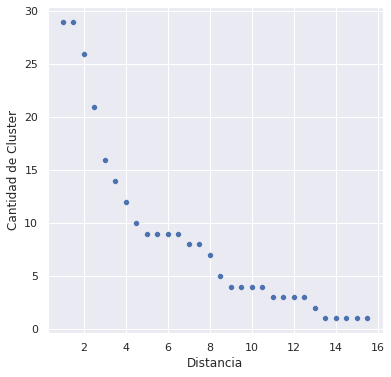

In [11]:
plot_scatter(explore_dbscan_1_to_11['distance'], explore_dbscan_1_to_11['cluster size'], 'Distancia', 'Cantidad de Cluster')

In [44]:
def dbsc_label(X, distance):
    db = DBSCAN(eps=distance, min_samples=1).fit(X)
    return db.labels_

In [45]:
cluster = dbsc_label(X, 6)

In [47]:
df_amine_with_names['cluster'] = cluster

In [ ]:
df_amine_with_names

In [61]:
amines_cluster_0_filter = df_amine_with_names['cluster'] == 0
amines_cluster_2_filter = df_amine_with_names['cluster'] == 2

other_amines = np.logical_not(np.logical_or(amines_cluster_2_filter, amines_cluster_0_filter))

#df_amine_with_names[df_amine_with_names['cluster'] == 0]['Chemical Abbreviation']
amines_cluster_0 = df_amine_with_names[amines_cluster_0_filter]['Chemical Abbreviation']
amines_cluster_2 = df_amine_with_names[amines_cluster_2_filter]['Chemical Abbreviation']
amines_cluster_other = df_amine_with_names[other_amines]['Chemical Abbreviation']

In [62]:
amines_cluster_other

1                                 AcNH3I
6         CyclohexylmethylammoniumIodide
7                                 GnNH3I
9     NNDiethylpropane13diammoniumiodide
22                   FormamidiniumIodide
25                nDodecylammoniumIodide
28                     ImidazoliumIodide
Name: Chemical Abbreviation, dtype: object

In [56]:
amines_cluster_0

0         IPentylammoniumIodide
2         Diethylammoniumiodide
3         iPropylammoniumIodide
5          iButylammoniumIodide
13         tButylammoniumIodide
14    Diisopropylammoniumiodide
15         nHexylammoniumIodide
16      neoPentylammoniumIodide
17                     n-BuNH3I
19      TertOctylammoniumIodide
20        NPropylammoniumIodide
26                      Me2NH2I
27                       MeNH3I
Name: Chemical Abbreviation, dtype: object

In [57]:
amines_cluster_2

4     4TrifluoromethylPhenylammoniumIodide
8                     PhenylammoniumIodide
10            4MethoxyPhenylammoniumIodide
11                    BenzylammoniumIodide
12                                PhEtNH3I
18    4TrifluoromethylBenzylammoniumIodide
21             4FluoroPhenylammoniumIodide
23          4FluoroPhenethylammoniumIodide
24         4methoxyphenethylammoniumiodide
Name: Chemical Abbreviation, dtype: object

In [7]:
chemical_names = utils.read_chemical_info()

In [46]:
cluster

array([0, 1, 0, 0, 2, 0, 3, 4, 2, 5, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       6, 2, 2, 7, 0, 0, 8])

## Visualization

### PCA 

In [33]:
def apply_pca(df, n_components):
    pca = PCA(n_components=n_components, svd_solver = 'auto')
    principal_components=pca.fit_transform(df)
    pca_columns = ['PCA_'+ str(n) for n in range(1,n_components+1)]
    pca_df = pd.DataFrame(data = principal_components, columns = pca_columns)
    return pca_df


In [34]:
def plot_3d_cluster(reduced_df, cluster_ids, name_color, method='PCA'):
    reduced_df[name_color] = cluster_ids
    reduced_df[name_color] = reduced_df[name_color].astype(str)
    if method == 'PCA':
        fig = px.scatter_3d(reduced_df, x='PCA_1', y='PCA_2', z='PCA_3',
                    color=name_color)
    else:
        fig = px.scatter_3d(reduced_df, x='TSNE_1', y='TSNE_2', z='TSNE_3',
            color=name_color)
    fig.show()


Transformed amines to 3 components

In [35]:
amine_3_components_pca = apply_pca(X, 3)

In [38]:
def plot_cluster_amine(X, amine_3_components, distance, method):
    labels = dbsc_label(X, distance)
    plot_3d_cluster(amine_3_components, labels, 'cluster_ID', method)


In [43]:
plot_cluster_amine(X, amine_3_components_pca, distance = 6, method='PCA')
# oversampling y undersampling
# agregar col extra de cluster
# considerar que los ejes de PCA su rango no es el mismo
# no es necesaro separarlos


In [44]:

def apply_tsne(df, n_components, perplexity):
    tsne_3d = TSNE(n_components=3, perplexity=perplexity)
    TCs_3d = tsne_3d.fit_transform(df)
    tsne_columns = ['TSNE_'+ str(n) for n in range(1,n_components+1)]
    tsne_df = pd.DataFrame(data = TCs_3d, columns = tsne_columns)
    return tsne_df


In [49]:
def explore_tsne(X, range_distance):
    clusters_size = np.zeros(range_distance.shape[0])
    for num, distance in enumerate(range_distance):
        db = DBSCAN(eps=distance, min_samples=1).fit(X)
        clusters_size[num] = len(set(db.labels_))
    return pd.DataFrame({'distance': range_distance, 'cluster size': clusters_size})


explore_tsne_1_to_11 = explore_tsne(X, np.arange(5,50,2))

In [ ]:
plot_scatter(explore_dbscan_1_to_11['distance'], explore_tsne_1_to_11['cluster size'], 'Distancia', 'Cantidad de Cluster')

In [46]:
 for perplexity in range(5,50,10):
    tsne_3_components = apply_tsne(X, 3, perplexity)
    plot_cluster_amine(tsne_3_components, tsne_3_components, distance = 6, method = 'TSNE')